In [1]:
import numpy as np
import pandas as pd
from statsmodels.stats import proportion
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/marketing_campaign.csv')
data.describe()

,user_id,date_served,marketing_channel,variant,language_displayed,converted
count,10037,10021,10022,10037,10037,10022
unique,10037,31,5,2,4,2
top,a1000,1/15/18,House Ads,control,English,False
freq,1,789,4733,5091,9793,8946


In [3]:
data

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True
2,a1002,1/1/18,House Ads,personalization,English,True
3,a1003,1/1/18,House Ads,personalization,English,True
4,a1004,1/1/18,House Ads,personalization,English,True
...,...,...,...,...,...,...
10032,a11032,1/17/18,Email,control,German,True
10033,a11033,1/17/18,Email,control,German,True
10034,a11034,1/5/18,Instagram,control,German,False
10035,a11035,1/17/18,Email,control,German,True


In [4]:
data.groupby('variant')['converted'].describe()

,count,unique,top,freq
variant,,,,
control,5076,2,False,4705
personalization,4946,2,False,4241


In [5]:
data.replace({'converted': {True: 1, False: 0}}, inplace=True)
data['converted'] = np.array(data['converted'], dtype=np.int8)

In [6]:
k1 = data[data['variant']=='control']['converted'].sum()
n1 = data[data['variant']=='control'].shape[0]
k2 = data[data['variant']=='personalization']['converted'].sum()
n2 = data[data['variant']=='personalization'].shape[0]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             10037 non-null  object
 1   date_served         10021 non-null  object
 2   marketing_channel   10022 non-null  object
 3   variant             10037 non-null  object
 4   language_displayed  10037 non-null  object
 5   converted           10037 non-null  int8  
dtypes: int8(1), object(5)
memory usage: 402.0+ KB


In [8]:
print(f'Конверсия группа A = {k1}/{n1}\nКонверсия группа B = {k2}/{n2}')

Конверсия группа A = 371/5091
Конверсия группа B = 705/4946


In [9]:
z_score, z_pvalue = proportion.proportions_ztest(np.array([k1, k2]),
                                                 np.array([n1, n2]))

print(f'Results are z_score={z_score:.3f} pvalue={z_pvalue:.3f}')

Results are z_score=-11.279 pvalue=0.000


Видно что различия статистически значимые, по количеству конверсий у группы "personalization"<br>
Сделаем визуализацию и возьмем для проверки еще какой-нибудь критерий


In [10]:
grouped = data.pivot_table(values='converted', index='variant', aggfunc=['sum', 'count'])
grouped

,sum,count
,converted,converted
variant,,
control,371.0,5091
personalization,705.0,4946


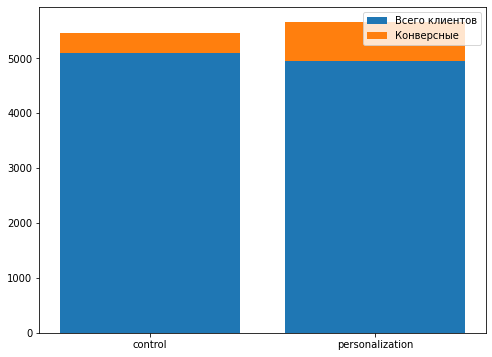

In [11]:
plt.figure(figsize=(8, 6))
plt.bar([1, 2], grouped['count']['converted'], label='Всего клиентов')
plt.bar([1, 2], grouped['sum']['converted'], bottom=grouped['count']['converted'], label='Конверсные')
plt.xticks([1, 2], ['control', 'personalization'])
plt.legend();

In [12]:
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1, k2]),
                                                        np.array([n1, n2]))

print(f'Results are chisq={chisq:.3f} pvalue={pvalue:.3f}')

Results are chisq=127.213 pvalue=0.000


Очевидно что в personalization конверсия больше практически в 2 раза, все стат. тесты подтверждают различие выборок

